In [3]:
import pandas as pd 

df = pd.read_csv('pumpkin_seeds.csv', encoding='latin1')
print(df.head())


    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  erevelik  
1       0.7487  erev

Change the class names to its appropriate name. This error occured due to the different characters that csv read. 

In [4]:
unique_class_values = df['Class'].unique()

class_mapping = {
    unique_class_values[0]: 'Cercevelik',
    unique_class_values[1]: 'Urgup Sivrisi'
}

# Apply the mapping to the 'Class' column
df['Class'] = df['Class'].map(class_mapping)

# Verify the changes
print(df['Class'].unique())

['Cercevelik' 'Urgup Sivrisi']


In [5]:
print(df.head())

    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Cercevelik  
1       0.7487  Cercev

Other Libraries to be used 

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Section 5. Exploratory Data Analysis 

In [12]:
print(df.describe())

                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min 

Matplotlib is building the font cache; this may take a moment.


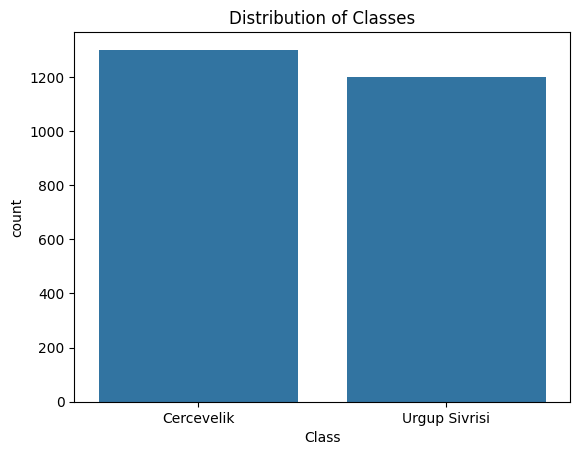

In [13]:
# Class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.show()


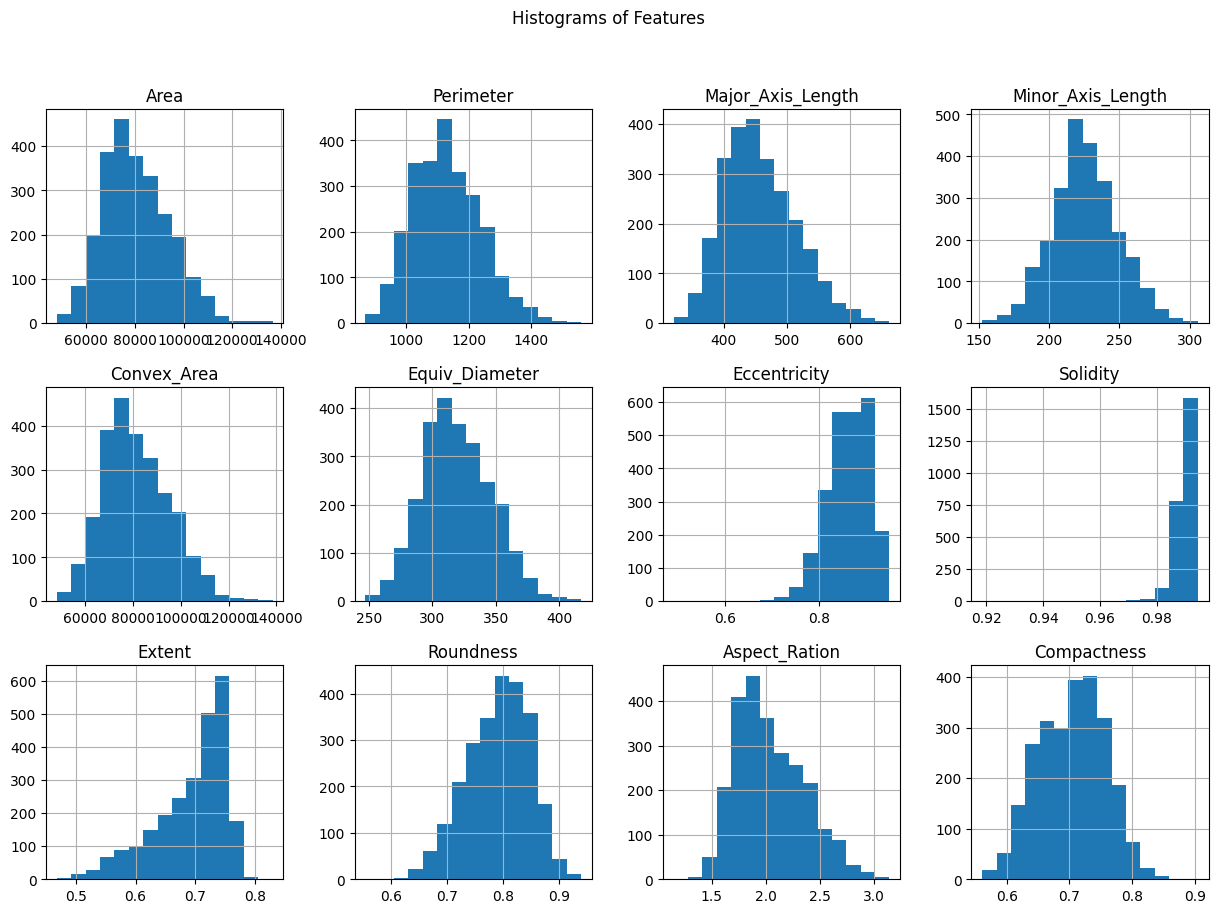

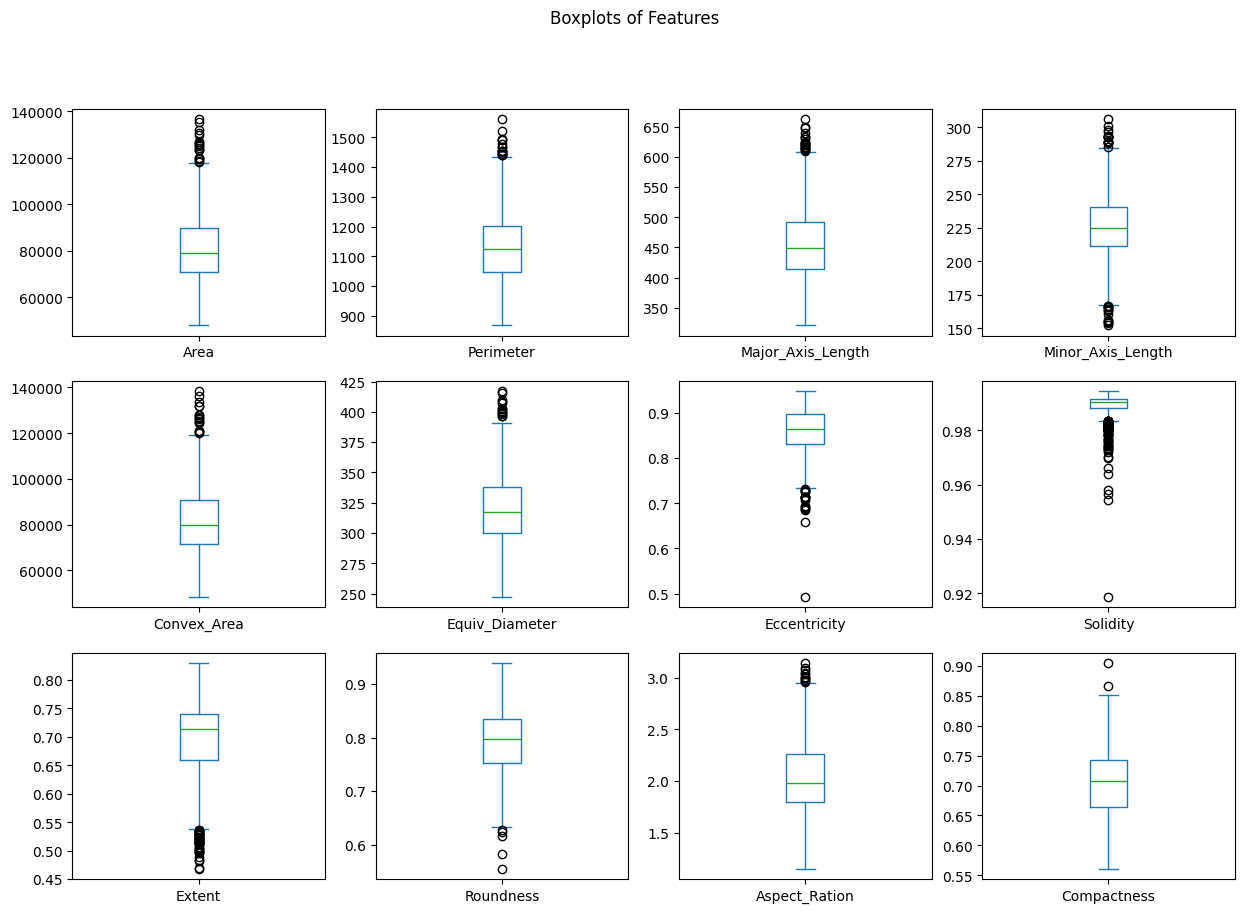

In [14]:
# Histograms for each feature
df.drop('Class', axis=1).hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Features')
plt.show()

# Boxplots for each feature
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(3,4), figsize=(15, 10))
plt.suptitle('Boxplots of Features')
plt.show()


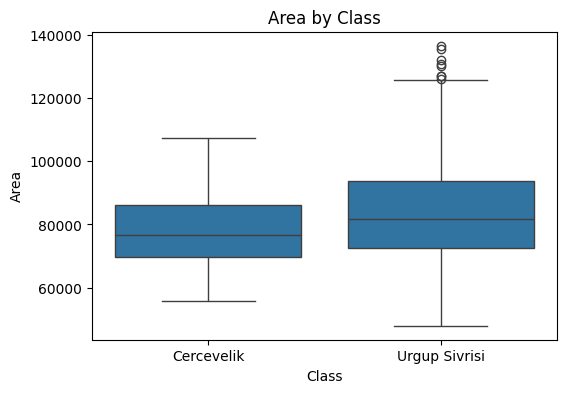

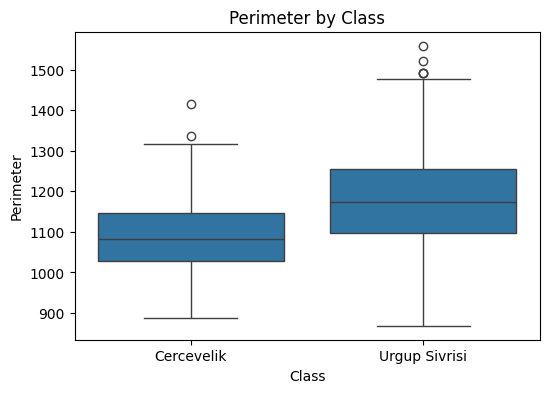

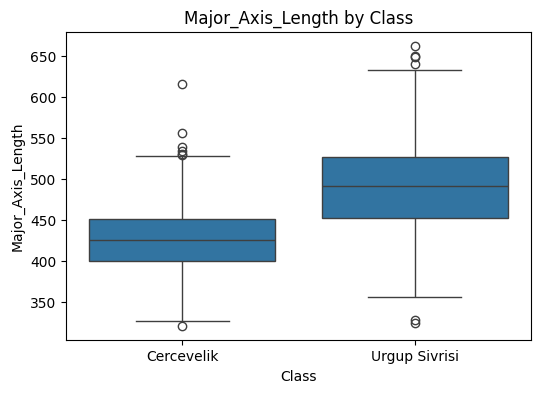

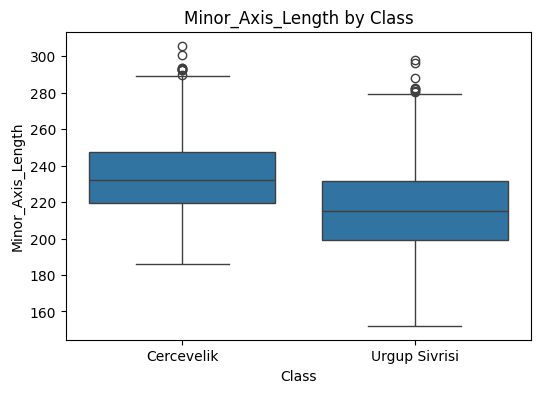

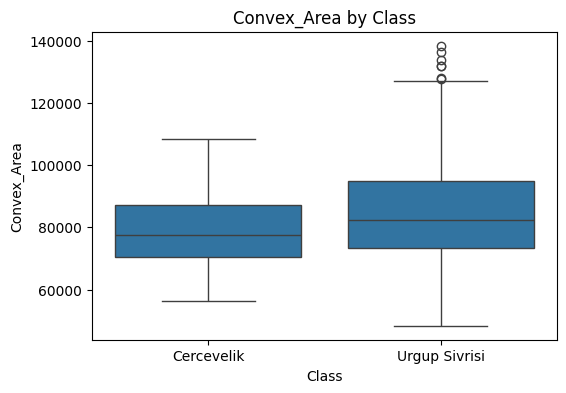

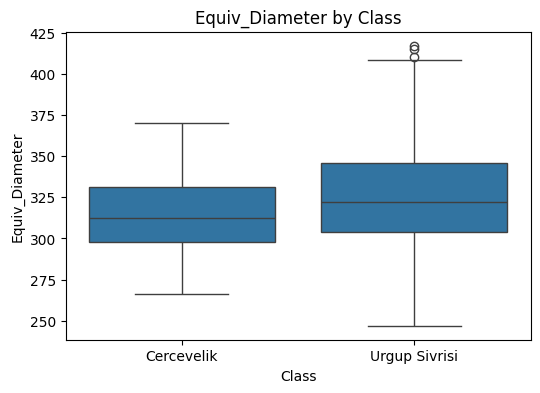

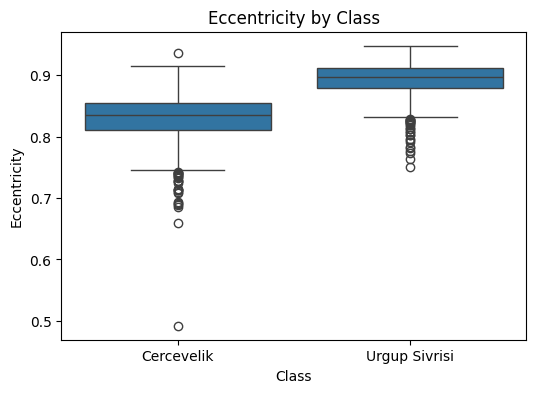

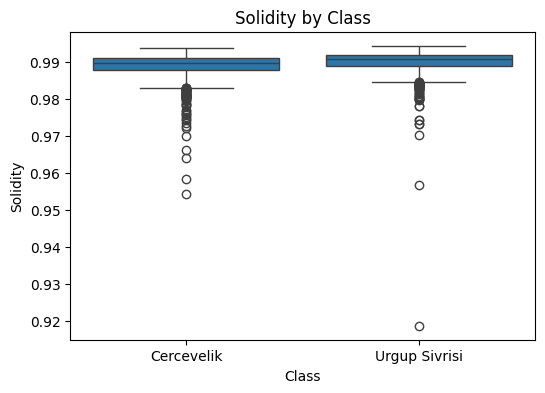

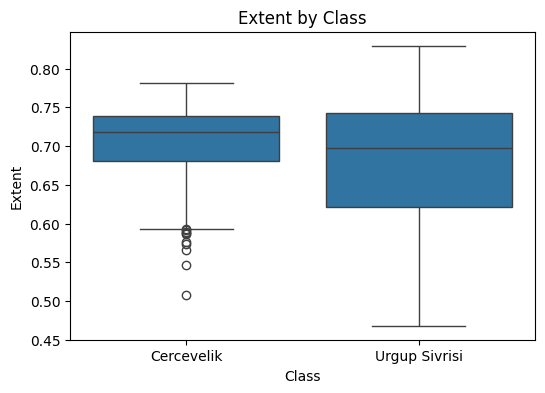

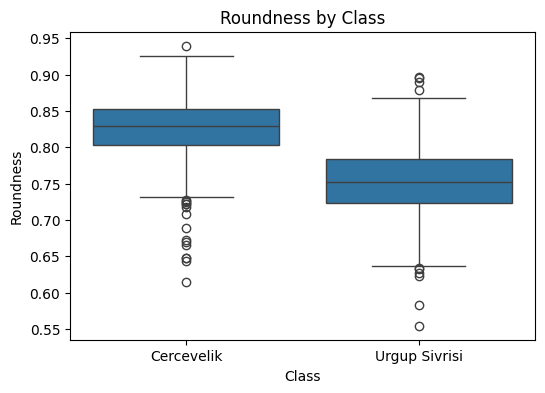

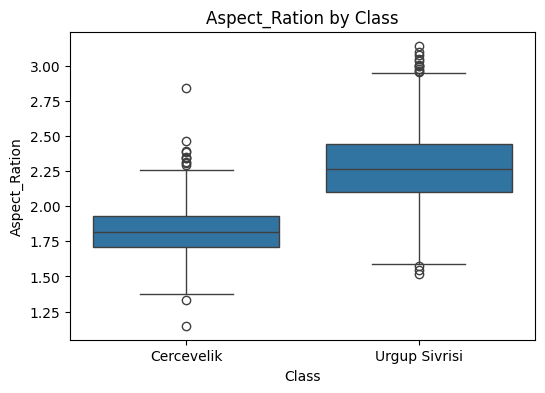

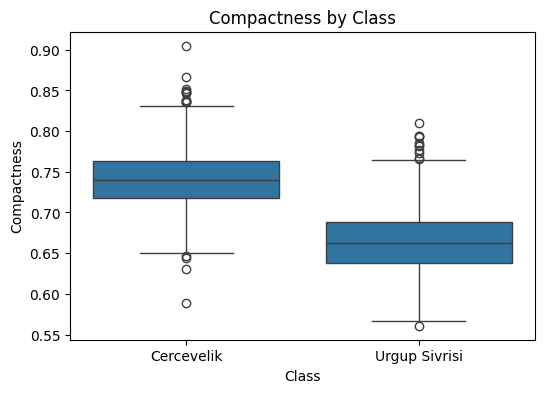

In [15]:
# Boxplots of features by class // Feature-Class Relationship 
features = df.columns.drop('Class')
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} by Class')
    plt.show()


In [16]:
# Pairplot // Pairwise relationship 
sns.pairplot(df, hue='Class')
plt.show()


# Section 6. Model Training

In [7]:
# Selecting features and target
features = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness']]
target = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

In [9]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_predictions = nb.predict(X_test_scaled)

In [10]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

In [11]:
# Evaluating the models
print("kNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

# Detailed report
print("\nkNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

kNN Accuracy: 0.8626666666666667
Naive Bayes Accuracy: 0.836
Logistic Regression Accuracy: 0.8546666666666667

kNN Classification Report:
                precision    recall  f1-score   support

   Cercevelik       0.87      0.87      0.87       390
Urgup Sivrisi       0.86      0.85      0.86       360

     accuracy                           0.86       750
    macro avg       0.86      0.86      0.86       750
 weighted avg       0.86      0.86      0.86       750

Naive Bayes Classification Report:
                precision    recall  f1-score   support

   Cercevelik       0.83      0.86      0.84       390
Urgup Sivrisi       0.84      0.81      0.83       360

     accuracy                           0.84       750
    macro avg       0.84      0.84      0.84       750
 weighted avg       0.84      0.84      0.84       750

Logistic Regression Classification Report:
                precision    recall  f1-score   support

   Cercevelik       0.85      0.87      0.86       390
Urgu